In [1]:
import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix
import torch
import matplotlib.ticker as ticker

%matplotlib inline

import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("png")

In [81]:
def createConfusionMatrix(y_true, y_pred, classes, binned=True, sessional=False, cmap = None, hline_at = None, vline_at= None, summarize = False, session = 0, cbar=False): #cmap="crest"
    # Build confusion matrix "Confusion matrix whose i-th row and j-th column entry indicates the number of samples with true label being i-th class and predicted label being j-th class."

    if sessional:
        session_ixs = [0, 60, 65, 70, 75, 80, 85, 90, 95, 100]
        session_ixs = session_ixs[:session+1]
        # Confusion matrix gt vs preds. if we want to see which preds are 
        # For all sessions sum the predictions up
        # Map each label to its session
        y_true = np.digitize(y_true, session_ixs)
        y_pred = np.digitize(y_pred, session_ixs)
        classes = session_ixs
        
    cf_matrix = confusion_matrix(y_true, y_pred, normalize='true')
    
#     df_cm = pd.DataFrame(cf_matrix/cf_matrix.sum(axis = 0), index=[i for i in classes],
#                          columns=[i for i in classes])
    df_cm = pd.DataFrame(cf_matrix, index=[i for i in classes],
                         columns=[i for i in classes])

    # Compute for each class the top 5 most confused predictions
    top_preds = np.flip(np.argsort(df_cm.to_numpy(), axis = 1)[:, -6:], axis = 1)

    plt.figure(figsize=(8 if cbar == False else 10, 8))    
    
    if binned:
        colors = sn.color_palette('rocket', 11)
        levels = np.linspace(0,1, 11)
        cmap, norm = matplotlib.colors.from_levels_and_colors(levels, colors, extend="max")
    else:
        cmap = norm = None
    
#     heatmap = sn.heatmap(df_cm, linewidths=0.0, square=True, 
#                          rasterized=True, annot=False, cmap = cmap, vmin=0, vmax=1,
#                          cbar=cbar)
    heatmap = sn.heatmap(df_cm, linewidths=0.0, square=True, 
                         rasterized=True, annot=False, cmap = plt.cm.jet, vmin=0, vmax=1,
                         cbar=cbar)
    if hline_at is not None:
        # line = heatmap.hlines([hline_at], *heatmap.get_xlim(), colors='y')
        # line.set_alpha(hline_alpha)  # Set opacity of the horizontal line
        line = heatmap.hlines([hline_at],*heatmap.get_xlim(), colors='y')
        line.set_alpha(0.7)
    if vline_at is not None:
        line = heatmap.vlines([vline_at],*heatmap.get_ylim(), colors='y')
        line.set_alpha(0.7)

#     heatmap.set(font_scale=2)  # crazy big
    
    if not sessional:
        y_ticks_indices = np.arange(0, len(classes), 10)
        heatmap.set_yticks(y_ticks_indices)
        heatmap.set_yticklabels([classes[i] for i in y_ticks_indices])

        x_ticks_indices = np.arange(0, len(classes), 10)
        heatmap.set_xticks(x_ticks_indices)
        heatmap.set_xticklabels([classes[i] for i in x_ticks_indices])
    else:
        y_ticks_indices = np.arange(0, len(session_ixs))
        heatmap.set_yticklabels("")
        heatmap.set_yticks(y_ticks_indices + 0.4999,      minor=True)
        heatmap.set_yticklabels([str(i) for i in y_ticks_indices], minor=True)

        x_ticks_indices = np.arange(0, len(session_ixs))
        heatmap.set_xticklabels("")
        heatmap.set_xticks(x_ticks_indices + 0.4999,      minor=True)
        heatmap.set_xticklabels([str(i) for i in x_ticks_indices], minor=True)

    plt.yticks(rotation=0)
    plt.xticks(rotation=0)
#     heatmap.set(xlabel="Predicted Classes", ylabel="True Classes", fontsize=20)
    if not sessional:
        heatmap.set_xlabel('Predicted Classes',fontsize=20)
        heatmap.set_ylabel('True Classes',fontsize=20)
    else:
        heatmap.set_xlabel('Predicted Session',fontsize=20)
        heatmap.set_ylabel('True Session',fontsize=20)
        
    heatmap.xaxis.set_label_coords(0.5,-0.08)
    
    return {"cm": heatmap.get_figure(), "df":df_cm}

## UniCon Confusion Matrices

In [82]:
sn.set(font_scale=1.5)

In [83]:
input_file_path = r"/BS/fscil/work/code/CEC-CVPR2021/figures/artefacts/unicon/testing_art_8.pickle"

load_obj = None
with open(input_file_path, "rb") as input_file:
    load_obj = pickle.load(input_file)

In [84]:
test_class = load_obj["base_class"] + load_obj["session"] * load_obj["way"]
classes = [str(i) for i in range(test_class)]

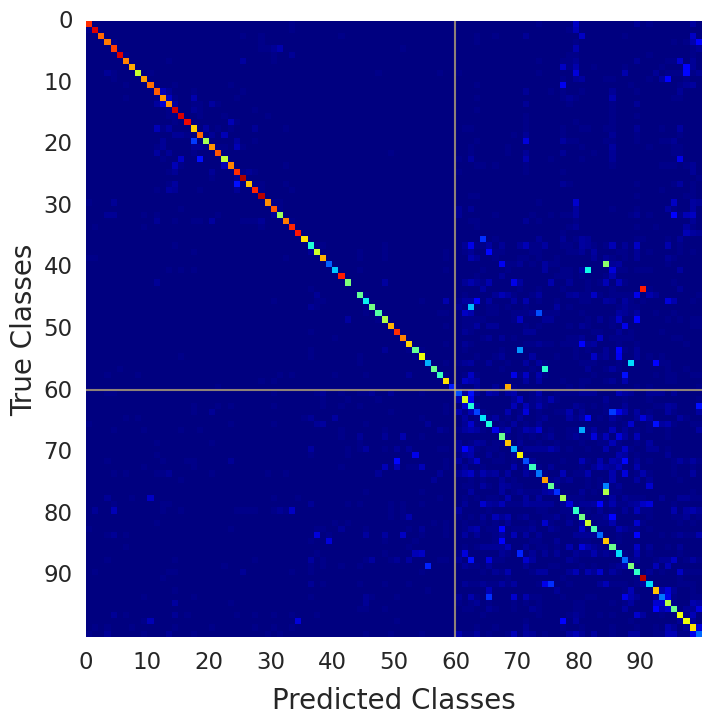

In [85]:
preds = np.argmax(load_obj["all_probs"], axis = 1)
cm = createConfusionMatrix(load_obj["all_targets"], preds, classes, hline_at=load_obj["base_class"], vline_at=load_obj["base_class"], session=load_obj["session"], binned=False)

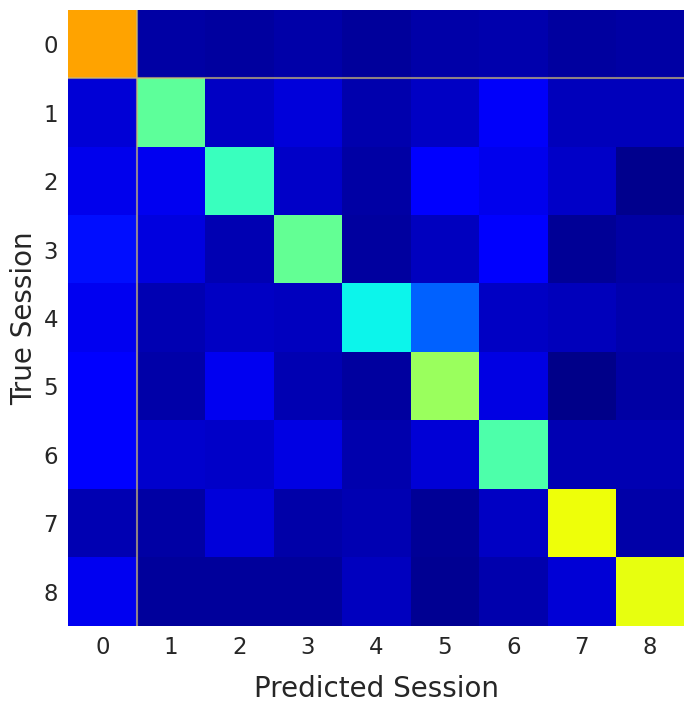

In [86]:
cm_sessional = createConfusionMatrix(load_obj["all_targets"], preds, classes, sessional=True, hline_at=1, vline_at=1, session=load_obj["session"], binned=False)

In [87]:
cm["cm"].savefig("./figure_exports/jet/cm_unicon.pdf", dpi=400)
cm_sessional["cm"].savefig("./figure_exports/jet/cm_sessional_unicon.pdf", dpi=400)

## BiDist FSCIL

In [98]:
input_file_path = r"/BS/fscil/work/code/CEC-CVPR2021/figures/artefacts/bidist/testing_art_8.pickle"

load_obj = None
with open(input_file_path, "rb") as input_file:
    load_obj = pickle.load(input_file)

test_class = load_obj["base_class"] + load_obj["session"] * load_obj["way"]
classes = [str(i) for i in range(test_class)]

In [99]:
preds = np.argmax(load_obj["all_probs"], axis = 1)

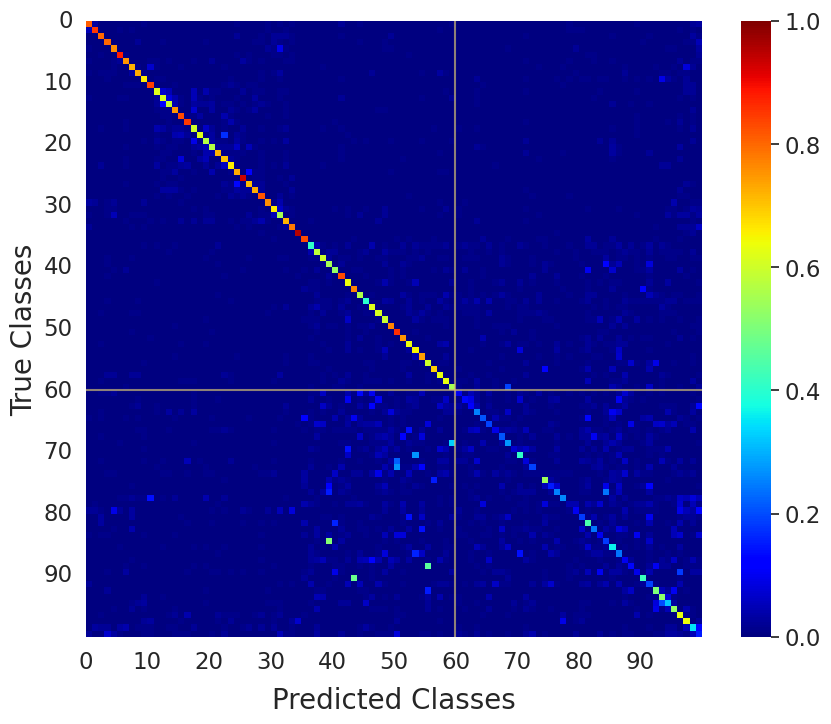

In [100]:
cm = createConfusionMatrix(load_obj["all_targets"], preds, classes, hline_at=load_obj["base_class"], vline_at=load_obj["base_class"], session=load_obj["session"], binned=False, cbar=True)

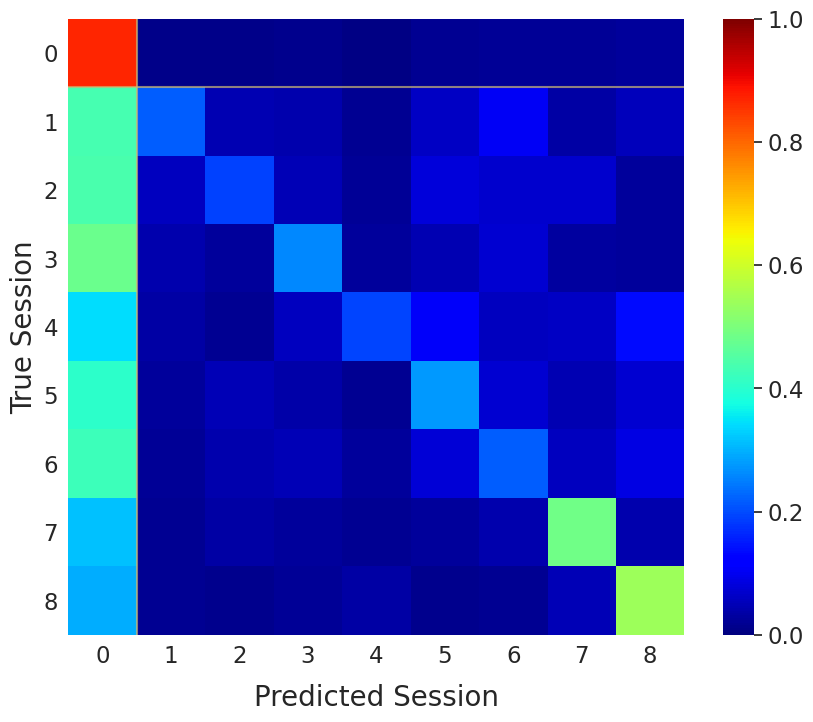

In [101]:
cm_sessional = createConfusionMatrix(load_obj["all_targets"], preds, classes, sessional=True, hline_at=1, vline_at=1, session=load_obj["session"], binned=False, cbar=True)

In [102]:
cm["cm"].savefig("./figure_exports/jet/cm_bidist.pdf", dpi=400)
cm_sessional["cm"].savefig("./figure_exports/jet/cm_sessional_bidist.pdf", dpi=400)

## Alice Confusion Matrices

In [73]:
input_file_path = r"/BS/fscil/work/code/CEC-CVPR2021/figures/artefacts/ALICE_minet/testing_art_8.pickle"

load_obj = None
with open(input_file_path, "rb") as input_file:
    load_obj = pickle.load(input_file)

test_class = load_obj["base_class"] + load_obj["session"] * load_obj["way"]
classes = [str(i) for i in range(test_class)]

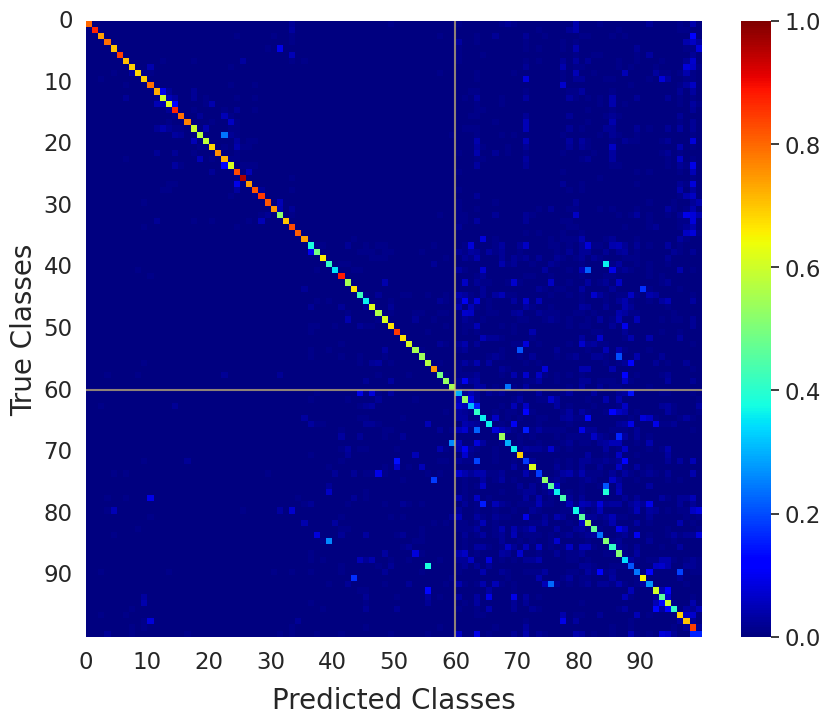

In [74]:
cm = createConfusionMatrix(load_obj["all_targets"], load_obj["all_probs"], classes, hline_at=load_obj["base_class"], vline_at=load_obj["base_class"], session=load_obj["session"], binned=False, cbar=True)

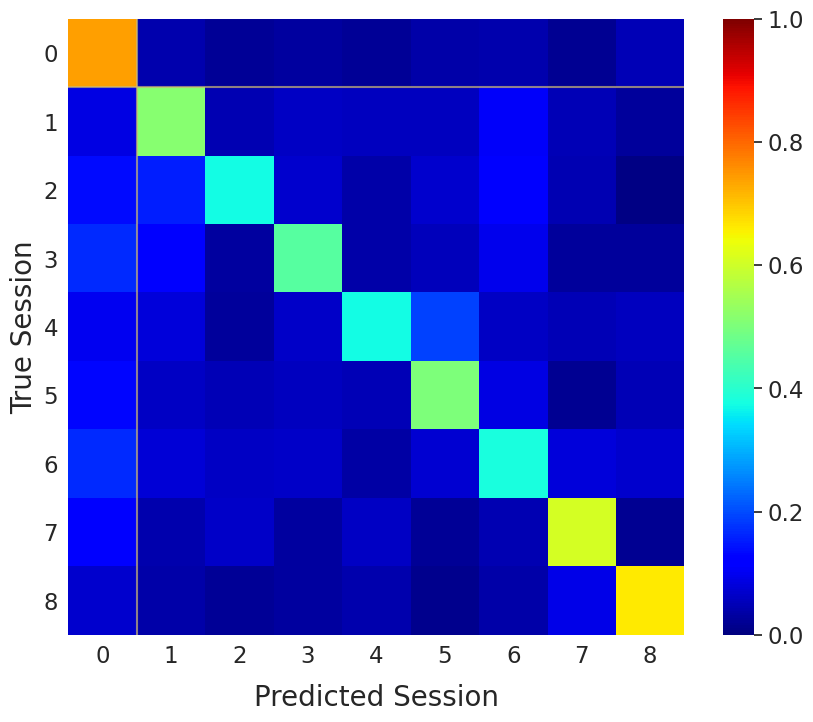

In [75]:
cm_sessional = createConfusionMatrix(load_obj["all_targets"], load_obj["all_probs"], classes, sessional=True, hline_at=1, vline_at=1, session=load_obj["session"], binned=False, cbar=True)

In [360]:
cm["cm"].savefig("./figure_exports/cm_alice.pdf", dpi=400)
cm_sessional["cm"].savefig("./figure_exports/cm_sessional_alice.pdf", dpi=400)

## NC-FSCIL Confusion Matrices

In [88]:
input_file_path = r"/BS/fscil/work/code/CEC-CVPR2021/figures/artefacts/ncfscil_minet/testing_art_9.pickle"

load_obj = None
with open(input_file_path, "rb") as input_file:
    load_obj = pickle.load(input_file)

test_class = load_obj["base_class"] + (load_obj["session"] - 1) * load_obj["way"]
classes = [str(i) for i in range(test_class)]

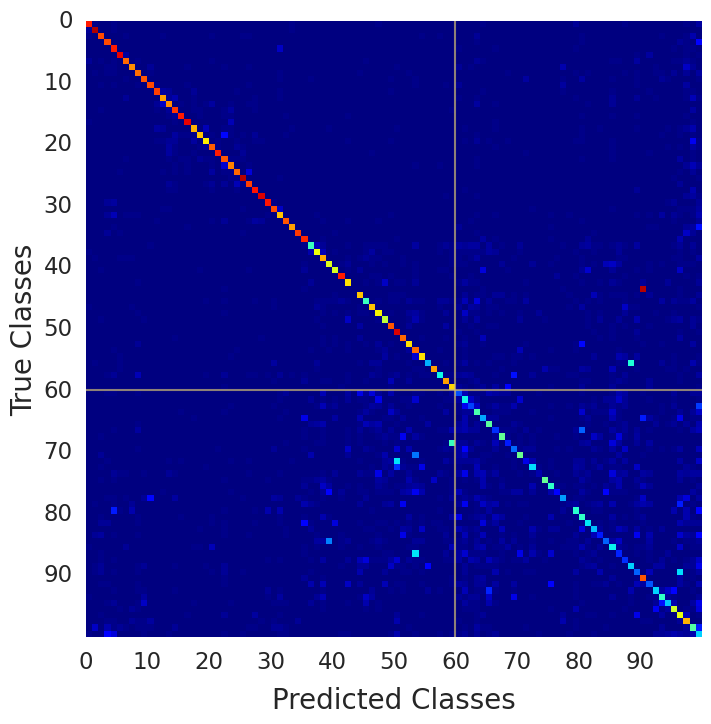

In [89]:
cm = createConfusionMatrix(load_obj["all_targets"].numpy(), np.array(load_obj["all_probs"]), classes, hline_at=load_obj["base_class"], vline_at=load_obj["base_class"], session=load_obj["session"], binned=False, cbar=False)

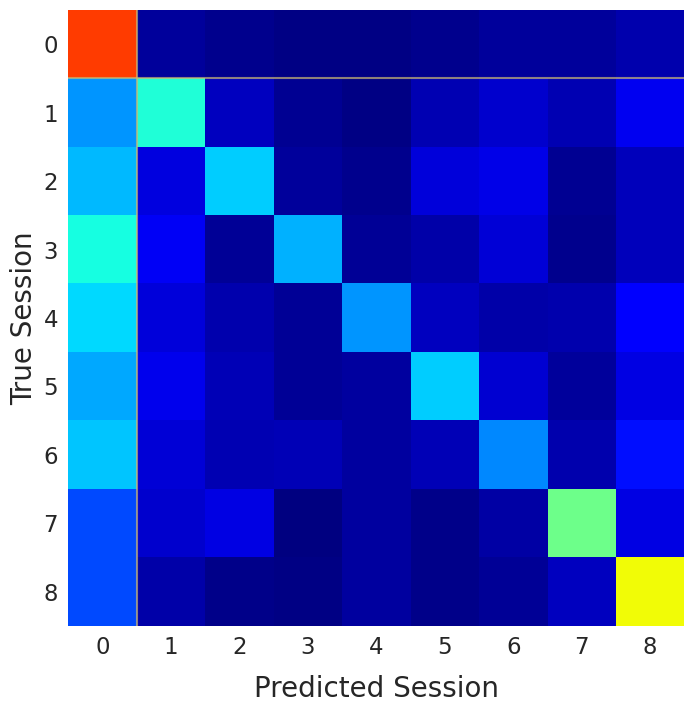

In [90]:
cm_sessional = createConfusionMatrix(load_obj["all_targets"].numpy(), np.array(load_obj["all_probs"]), classes, sessional=True, hline_at=1, vline_at=1, session=load_obj["session"]-1, binned=False, cbar=False)

In [91]:
cm["cm"].savefig("./figure_exports/jet/cm_ncfscil.pdf", dpi=400)
cm_sessional["cm"].savefig("./figure_exports/jet/cm_sessional_ncfscil.pdf", dpi=400)

## UniCon Logit

## UniCon tested with prototypes

In [39]:
def compute_logits(projections, prototypes):
    proj_norm = projections / np.linalg.norm(projections, axis=1)[:, np.newaxis]

    prot_norm = prototypes / np.linalg.norm(prototypes, axis=1)[:, np.newaxis]

    logits = np.matmul(proj_norm, prot_norm.T)
    return logits
    
def calculate_hm(load_obj, prototypes, prototypes2 = None):
    projections = load_obj["all_projections"]

    labels = load_obj["all_targets"]

    logits = compute_logits(projections, prototypes)
    if prototypes2 is not None:
        logits2 = compute_logits(projections, prototypes2)
        logits += logits2

    preds = np.argmax(logits, axis = 1)

    acc = (preds == labels).mean()
    base_mask = labels < 60
    base_acc = (preds[base_mask] == labels[base_mask]).mean()
    novel_mask = labels >= 60
    novel_acc = (preds[novel_mask] == labels[novel_mask]).mean()
    
    print(f"base/novel: {base_acc*100:.3f}/{novel_acc*100:.3f}")
    hm = 2*base_acc*novel_acc / (base_acc + novel_acc)
    return hm

In [46]:
hm_prototypes = []
hm_pseudotargets = []
hm_comb = []
for i in range(1,9):
    input_file_path = fr"/BS/fscil/work/code/CEC-CVPR2021/figures/artefacts/unicon_rerun/testing_art_{i}.pickle"

    load_obj = None
    with open(input_file_path, "rb") as input_file:
        load_obj = pickle.load(input_file)
        
    hm_prototypes.append(calculate_hm(load_obj, load_obj["joint_prototypes"]))
    hm_pseudotargets.append(calculate_hm(load_obj, load_obj["fc"]))
    hm_comb.append(calculate_hm(load_obj, load_obj["fc"], load_obj["joint_prototypes"]))

base/novel: 76.450/62.400
base/novel: 74.133/56.100
base/novel: 72.050/52.800
base/novel: 71.200/48.900
base/novel: 70.517/45.440
base/novel: 69.217/42.167
base/novel: 68.133/42.943
base/novel: 67.583/43.750


In [41]:
(np.array(hm_prototypes) * 100).round(3).mean()

52.851749999999996

In [47]:
(np.array(hm_pseudotargets) * 100).round(3).mean()

58.121875

In [43]:
(np.array(hm_comb) * 100).round(3)

array([66.552, 62.618, 59.303, 56.4  , 53.902, 50.484, 51.06 , 51.449])

In [44]:
np.array(hm_comb).mean()

0.5647105817230307

## Inter class angle analysis

In [2038]:
OrcoUni = fr"/BS/fscil/work/code/CEC-CVPR2021/figures/artefacts/unicon/"

In [2039]:
OrCoGaus = fr"/BS/fscil/work/code/CEC-CVPR2021/figures/artefacts/best_minet_simclr01_convexcomb_gaus_pert/"

In [2040]:
WithoutPert = fr"/BS/fscil/work/code/CEC-CVPR2021/figures/artefacts/best_minet_simclr01_convexcomb_without_pert/"

In [2003]:
from sklearn.metrics.pairwise import cosine_similarity

In [2035]:
def get_base_to_target(path, base_only = False):
    values = []
    for i in range(1,9):
        input_file_path = path + fr"testing_art_{i}.pickle"

        load_obj = None
        with open(input_file_path, "rb") as input_file:
            load_obj = pickle.load(input_file)
            
        projection_features = load_obj["all_projections"]
        fc_rv = load_obj["rv"]
        
        if base_only:
            targets = load_obj["all_targets"]
            base_mask = targets > load_obj["base_class"]
            projection_features = projection_features[base_mask]
    
        if 0 not in fc_rv.shape:
            cos_sim_to_unassigned = cosine_similarity(fc_rv, projection_features).mean()
            values.append(cos_sim_to_unassigned)
        
    if base_only:
        print("The cosine similarity for all projected base test features to unassigned targets", np.mean(values))
    else:
        print("The cosine similarity for all projected test features to unassigned targets", np.mean(values))

In [2036]:
get_base_to_target(OrcoUni, base_only = True)

The cosine similarity for all projected base test features to unassigned targets -0.009439371


In [2041]:
get_base_to_target(OrCoGaus, base_only = True)

The cosine similarity for all projected base test features to unassigned targets -0.0081835585


In [2042]:
get_base_to_target(WithoutPert, base_only = True)

The cosine similarity for all projected base test features to unassigned targets -0.022577034


## UniCon Pseudo Targets Evolution

In [1226]:
import torch
import os
from tqdm import tqdm
import torch.nn.functional as F

def set_gpu(gpu):
    gpu_list = [int(x) for x in gpu.split(',')]
    print('use gpu:', gpu_list)
    os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
    os.environ['CUDA_VISIBLE_DEVICES'] = gpu
    return gpu_list.__len__()

In [1227]:
set_gpu("2")

use gpu: [2]


1

In [103]:
def compute_angles(vectors):
    # Compute angles for each vector with all others from 
    # Compute angles with the closesnt neighbour only
    proto = vectors.cpu().numpy()
    dot = np.matmul(proto, proto.T)
    dot = dot.clip(min=0, max=1)
    theta = np.arccos(dot)
    np.fill_diagonal(theta, np.nan)
    theta = theta[~np.isnan(theta)].reshape(theta.shape[0], theta.shape[1] - 1)
    
    avg_angle_close = theta.min(axis = 1).mean()
    
    avg_angle = theta.mean()

    return np.rad2deg(avg_angle), np.rad2deg(avg_angle_close)

def normalize(x): 
    x = x / torch.norm(x, dim=1, p=2, keepdim=True)
    return x

In [1228]:


points = torch.randn(100, 128)
points = normalize(points)
points = torch.nn.Parameter(points)
opt = torch.optim.SGD([points], lr=1)
temperature = 1

angle_list = []
avg_angle_list = []

# TODO: Choose 2 points randomly
ixs = torch.randperm(points.shape[0])[:2]

tqdm_gen = tqdm(range(1000))
best_angle = 0
for idx, _ in enumerate(tqdm_gen):
    sim = F.cosine_similarity(points[None,:,:], points[:,None,:], dim=-1)
    sim.fill_diagonal_(0)
    l = torch.log(torch.exp(sim/temperature).sum(axis = 1)).sum() / points.shape[0]

    l.backward()
    opt.step()
    points.data = normalize(points.data)

    curr_angle, curr_angle_close = compute_angles(points.detach())
    if curr_angle > best_angle: # best angle is the angle with which the separation is maximised
        best_angle = curr_angle
        
    angle_list.append(compute_angles(points[ixs].detach())[0])
    avg_angle_list.append(curr_angle)
    
    tqdm_gen.set_description(f"Loss = {l:.5f}, Best Avg Angle [all]: {best_angle:.3f}, Average Angle rv [close]: {curr_angle_close:.3f}")

Loss = 4.59517, Best Avg Angle [all]: 90.000, Average Angle rv [close]: 90.000: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 215.03it/s]


In [1304]:
y_ticks_indices = np.arange(np.floor(np.min(angle_list + avg_angle_list)), 91, 1).astype(np.int)

/tmp/ipykernel_8654/72070885.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_ticks_indices = np.arange(np.floor(np.min(angle_list + avg_angle_list)), 91, 1).astype(np.int)


In [1305]:
y_ticks_indices

array([87, 88, 89, 90])

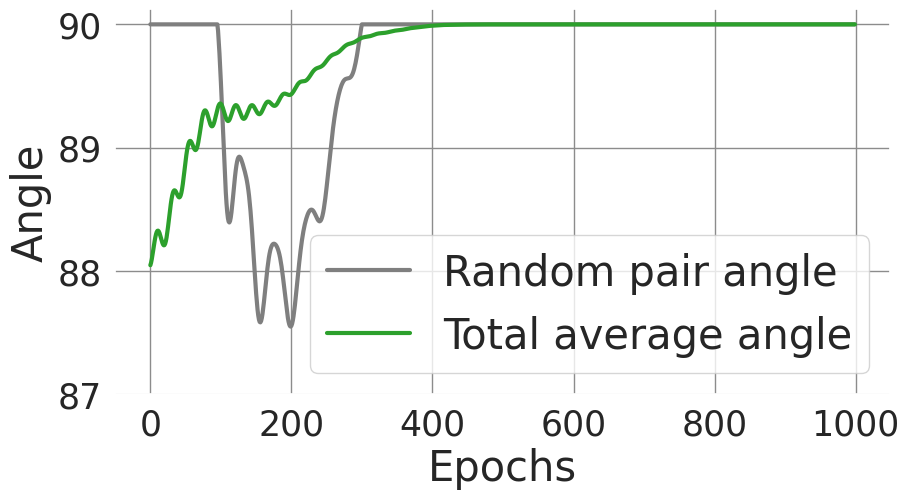

In [1916]:
# Create an array of indices
epochs = np.arange(len(angle_list))

# Calculate line widths based on angle values
# line_widths = np.array(angle_list) / max(angle_list) * 5  # Adjust the scale factor (5) as needed

sn.set(font_scale=1.5)

# fig, ax = plt.subplots(nrows=1, ncols=1)
# Create the plot
# ax.plot(epochs, angle_list, linestyle='-', label="Angle b/w pseudo target pair")
# ax.plot(epochs, avg_angle_list, linestyle='-', label = "Average Angle b/w all pseudo targets")

rc = {'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '.55',}
plt.rcParams.update(rc) 

plt.figure(figsize=(10,5))  

lp = sn.lineplot(x = epochs, y = angle_list, color=colors["NC-FSCIL"], label="Random pair angle", linewidth = 3)
lp = sn.lineplot(x = epochs, y = avg_angle_list, color=colors["OrCon(Ours)"], label="Total average angle", linewidth = 3)

lp.set_xlabel('Epochs', fontsize=30)
lp.set_ylabel('Angle', fontsize=30)

y_ticks_indices = np.arange(np.floor(np.min(angle_list + avg_angle_list)), 91, 1).astype(np.int32)
lp.set_yticks(y_ticks_indices)
lp.set_yticklabels([classes[i] for i in y_ticks_indices], fontsize=25)
lp.tick_params(axis='x', labelsize=25)

# ax.xlabel('Epochs')
# ax.ylabel('Angle (Degrees)')
lp.legend(fontsize=30, loc="lower right")
# lp.set_facecolor((1.0, 1, 1))
evolve_fig = lp.get_figure()

In [1917]:
evolve_fig.savefig("./figure_exports/evolvefig.pdf", bbox_inches='tight')

## UniCon Pseudo Targets Evolution

In [3]:
from matplotlib.cm import get_cmap

In [95]:
minet_sota_str = """IW	Completed	25.32, 20.45, 22.62, 25.48, 22.54, 20.66, 21.27, 22.27	22.576
FACT	Completed	25.320, 27.732, 26.455, 24.500, 22.942, 20.413, 20.863, 21.198	23.678
CEC	Completed	31.911, 31.837, 30.984, 30.736, 28.144, 26.778, 26.963, 27.419	29.347
C-FSCIL	Completed	9.735, 20.53 , 28.683, 31.906, 34.848, 35.048, 37.718, 37.917	29.548
LIMIT	Completed	40.343, 33.577, 31.808, 31.737, 29.324, 29.108, 29.569, 30.278	31.968
LCwoF	Completed	41.24, 38.96, 39.08, 38.67, 36.75, 35.47, 34.71, 35.02	37.488
BiDistFSCIL	Completed	42.423,43.863,43.872,40.343,38.969,38.006,36.848,38.468	40.349
NC-FSCIL	Completed	62.34, 61.04, 55.93, 53.13, 49.68, 47.08, 46.22, 45.57	52.624
OrCo(Thesis)	Completed	66.786, 63.104, 60.455, 58.139, 55.482, 53.025, 52.877, 52.083	57.74"""
#OrCo(Ours)	Completed	68.714, 63.868, 60.941, 57.98, 55.267, 52.407, 52.682, 53.116	58.122"""



cifar_sota_str = """IW	Completed	42.312, 44.788, 41.286, 40.261, 38.882, 39.75, 39.408, 38.212	40.612
FACT	Completed	42.149, 38.167, 34.361, 33.897, 34.682, 35.011, 33.561, 32.966	35.599
CEC	Completed	41.788, 39.439, 33.909, 33.054, 33.785, 33.387, 32.894, 31.967	35.028
LIMIT	Completed	39.978, 36.983, 33.249, 32.639, 32.279, 32.658, 31.967, 31.392	33.893
BiDistFSCIL	Completed	47.866, 42.685, 40.187, 37.015, 35.419, 33.800, 33.252, 30.939	37.645
C-FSCIL	Completed	31.47, 28.33, 26.68, 23.11, 24.85, 24.29, 23.04, 23.49	25.658
NC-FSCIL	Completed	56.66 , 54.413, 49.697, 45.264, 44.356, 46.653, 44.209, 40.414	47.71
OrCo(Thesis)	Completed	70.434, 61.527, 55.743, 52.11, 51.295, 50.439, 49.309, 47.844	54.84"""
#OrCo(Ours)	Completed	72.122, 63.914, 56.895, 55.214, 53.368, 54.045, 51.785, 49.564	57.11"""

cub_sota_str = """IW	Completed	50.261, 46.303, 39.229, 42.625, 41.15, 42.15, 41.742, 40.825, 41.223, 40.093	42.56
FACT	Completed	62.165, 57.341, 50.064, 51.939, 50.018, 51.360, 51.775, 50.363, 51.811, 51.515	52.835
CEC	Completed	56.177, 53.163, 45.68, 48.449, 45.482, 46.303, 46.327, 45.06, 46.346, 46.071	47.906
BiDistFSCIL	Completed	63.327, 57.254, 50.565, 52.943, 50.113, 49.888, 50.306, 48.221, 50.881, 50.771	52.427
LIMIT	Completed	61.11, 57.187, 50.704, 52.394, 50.517, 51.404, 52.778, 51.36, 52.508, 53.566	53.353
NC-FSCIL	Completed	71.426, 57.2986, 55.2524, 57.5633, 54.1499, 56.0491, 56.6010, 53.5495, 54.6306, 55.0310	57.155
OrCo(Thesis)	Completed	62.907, 62.346, 58.139, 56.554, 53.932, 53.753, 52.477, 50.273, 51.091, 50.517	55.199"""
#OrCo(Ours)	Completed	72.021, 64.572, 59.382, 59.786, 57.19, 57.547, 57.1, 55.456, 56.799, 56.633	59.649"""

cmap = get_cmap('tab20')
colors = {"IW":cmap(0),
"FACT":cmap(2),
"CEC":cmap(16),
"LIMIT":cmap(6),
"LCwoF":cmap(8),
"BiDistFSCIL":cmap(10),
# "ALICE":cmap(12),
"NC-FSCIL":cmap(14),
"C-FSCIL":cmap(18),
"OrCo(Ours)":cmap(4),
"OrCo(Thesis)":cmap(4)}

markers = {"IW":'o',
"FACT":'s',
"CEC":'^',
"LIMIT":'D',
"LCwoF":'v',
"BiDistFSCIL":'*',
# "ALICE":'P',
"NC-FSCIL":'X',
"C-FSCIL":'d',
"OrCo(Ours)":'H',
"OrCo(Thesis)":'H'}

In [96]:
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = True

def plot_sotas(sotas, names, figsize=(17, 5)):
    fig, axes = plt.subplots(nrows=1, ncols=len(sotas),figsize=figsize)
    
    for s_i, sota_str in enumerate(sotas):
        parsed_minet_sota = {}
        sota_list = sota_str.split("\n")
        methods = []
        swhms = []
        avg_hms = []
        for line in sota_list:
            method, statue, swhm, avghm = line.split("\t")
            methods.append(method)
            swhms.append(swhm)
            avg_hms.append(avghm)

        swhms = [[float(i) for i in swhm.split(",")] for swhm in swhms]
        avg_hms = [float(ahms) for ahms in avg_hms]
        
        for i, method in enumerate(methods):
            line_style="-"
            if method == "OrCo(Thesis)":
                line_style="--"
            axes[s_i].plot(swhms[i], marker=markers[method], label=method, color=colors[method], linewidth=1, linestyle=line_style)

        # Set labels and title
#         if s_i == 0:
#             plt.ylabel('Harmonic Mean (%)')
        
#         axes[s_i].grid(True, linestyle='--')
        axes[s_i].grid(b=True, color="grey", linestyle='--', linewidth=0.3)
        axes[s_i].set_xticks(np.arange(len(swhms[0])), np.arange(1, len(swhms[0]) + 1))
#         axes[s_i].set_yticks(np.arange(20, 80, 10), np.arange(20, 80, 10))
        
        # Calculate the average delta for the highest performing method from the second highest performing method
        highest_method_idx = np.argmax(avg_hms)
        second_highest_method_idx = np.argsort(avg_hms)[-2]

        average_delta = avg_hms[highest_method_idx] - avg_hms[second_highest_method_idx]
        if "OrCo" in methods[highest_method_idx]:
            best_color="darkgreen"
            selected_arrow = "↑"
        else:
            best_color="darkred"
            selected_arrow = "↓"

        # Add a text annotation at the end of the plot
        # plt.annotate(f'Average Delta: {average_delta:.2f}%', xy=(len(swhms[0]) - 0.5, swhms[-1][highest_method_idx]),
        #              xytext=(len(swhms[0]) + 1, swhms[-1][highest_method_idx]),
        #              arrowprops=dict(facecolor='black', arrowstyle='->'),
        #              fontsize=10, ha='left', va='center')

        if names[s_i] == "CIFAR100":
            y_offset = 7
            x_offset = -3.8      
        elif names[s_i] == "Mini-Imagenet":
            y_offset = 4.5
            x_offset = -3.2
        else:
            y_offset = 4.2
            x_offset = -4.5
        
        arrows = ["↓", "↑"]
#         best_color="darkgreen"
        axes[s_i].text(len(swhms[0]) + x_offset, swhms[highest_method_idx][-1] + y_offset,f'∆aHM={selected_arrow}{average_delta:.1f}',fontsize=18, ha='left', va='center', color=best_color)
        axes[s_i].set_title(names[s_i], fontsize=30)
        axes[s_i].set_xlabel("Session", fontsize=25)
    
    fig.tight_layout()
    # plt.title('Line Plot for Each Method')
#     fig.xlabel('Sessions', y = -0.05, fontsize=30)
#     fig.supxlabel('Sessions', y = -0.05, fontsize=30)
    fig.supylabel('Harmonic Mean (%)', x = -0.02, fontsize=30)

#     handles, labels = plt.gca().get_legend_handles_labels()
    handles = []
    for c in colors.keys():
        handles.append(Line2D([0], [0], label=c, color=colors[c], marker=markers[c]))
    
#     fig.legend(handles=handles, bbox_to_anchor=(0.83, 1.25), ncol=3, fancybox=False, shadow=True)
    fig.legend(handles=handles, bbox_to_anchor=(0.66, 1.18), ncol=4, fancybox=False, shadow=True)
    # Show the plot
    plt.show()
    return fig

/tmp/ipykernel_15497/3050053188.py:35: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  axes[s_i].grid(b=True, color="grey", linestyle='--', linewidth=0.3)


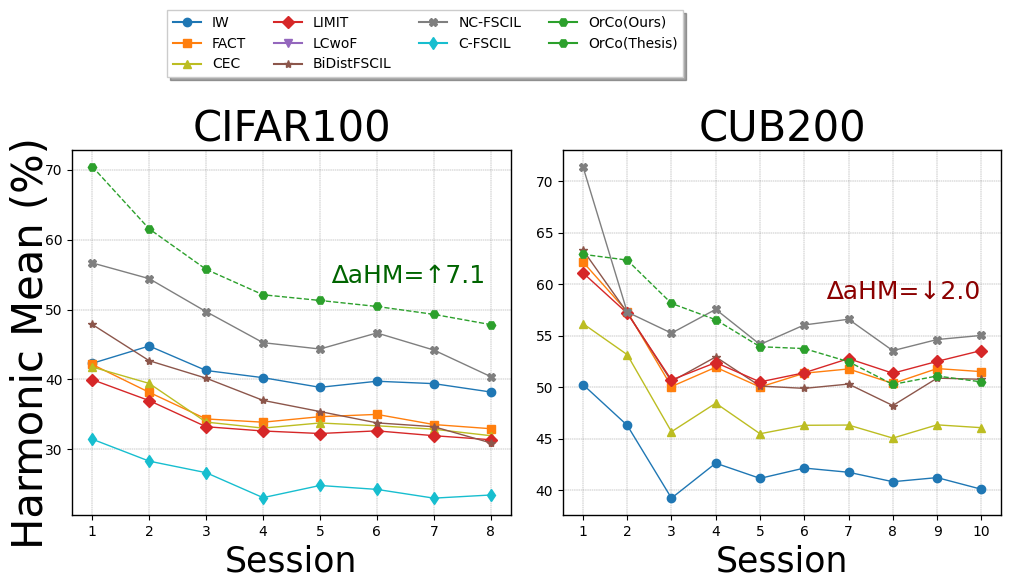

In [97]:
sota_fig = plot_sotas([cifar_sota_str, cub_sota_str], names=["CIFAR100", "CUB200"], figsize=(10,5))

/tmp/ipykernel_15497/3050053188.py:35: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  axes[s_i].grid(b=True, color="grey", linestyle='--', linewidth=0.3)


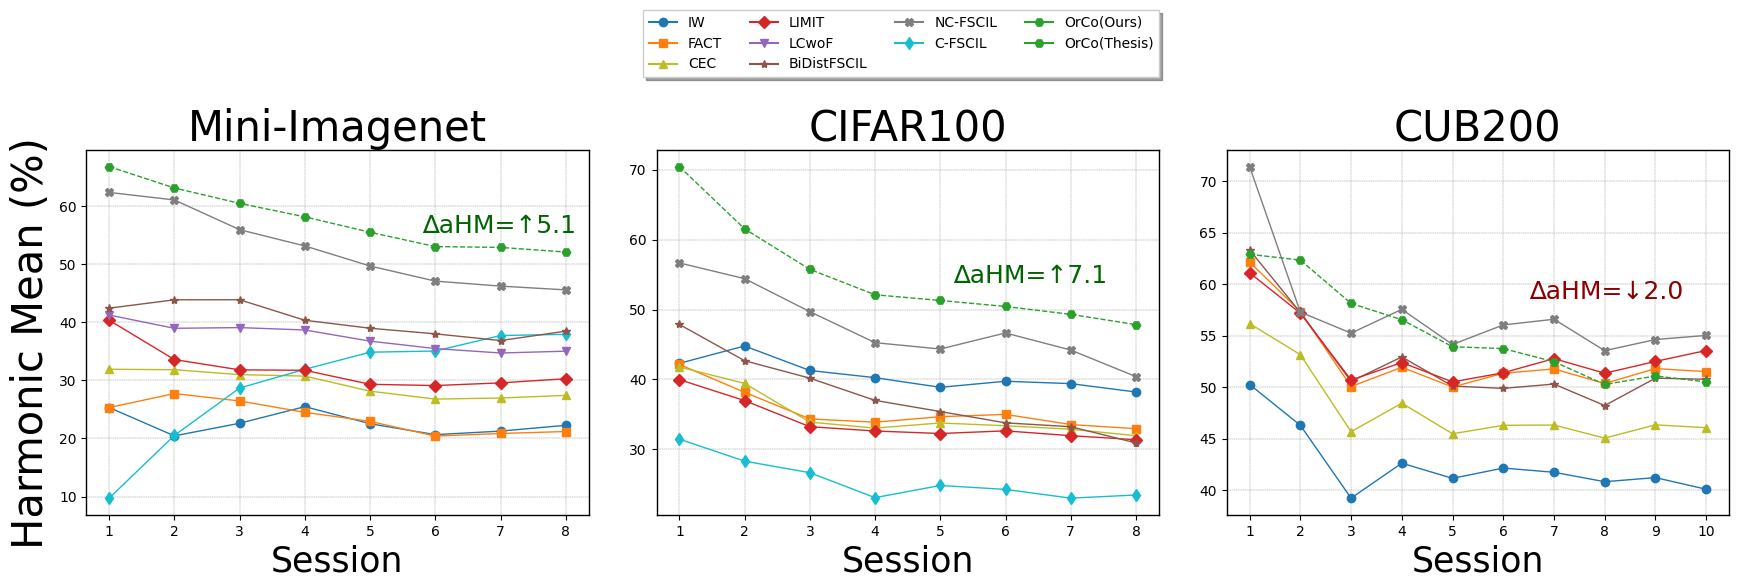

In [98]:
sota_fig = plot_sotas([minet_sota_str, cifar_sota_str, cub_sota_str], names=["Mini-Imagenet", "CIFAR100", "CUB200"])

In [99]:
sota_fig.savefig("./figure_exports/sota_fig_all_thesis.png", bbox_inches='tight')

## Perturbation ablation

In [1339]:
import pandas as pd

In [1365]:
data = {
    "Perturbation": ["w/o", "$\mathcal{N}$", "$\mathcal{U}$"],
    "Incremental FP ↓": [66.5, 54.6, 52.5],
    "Inter-Class Sim ↓": [0.105, 0.002, 0.011],
    "Inter-Class-Target Sim ↓": [0.013, 0.006, 0.006],
    "HM ↑": [20.14, 50.23, 53.12]
}

df = pd.DataFrame(data)

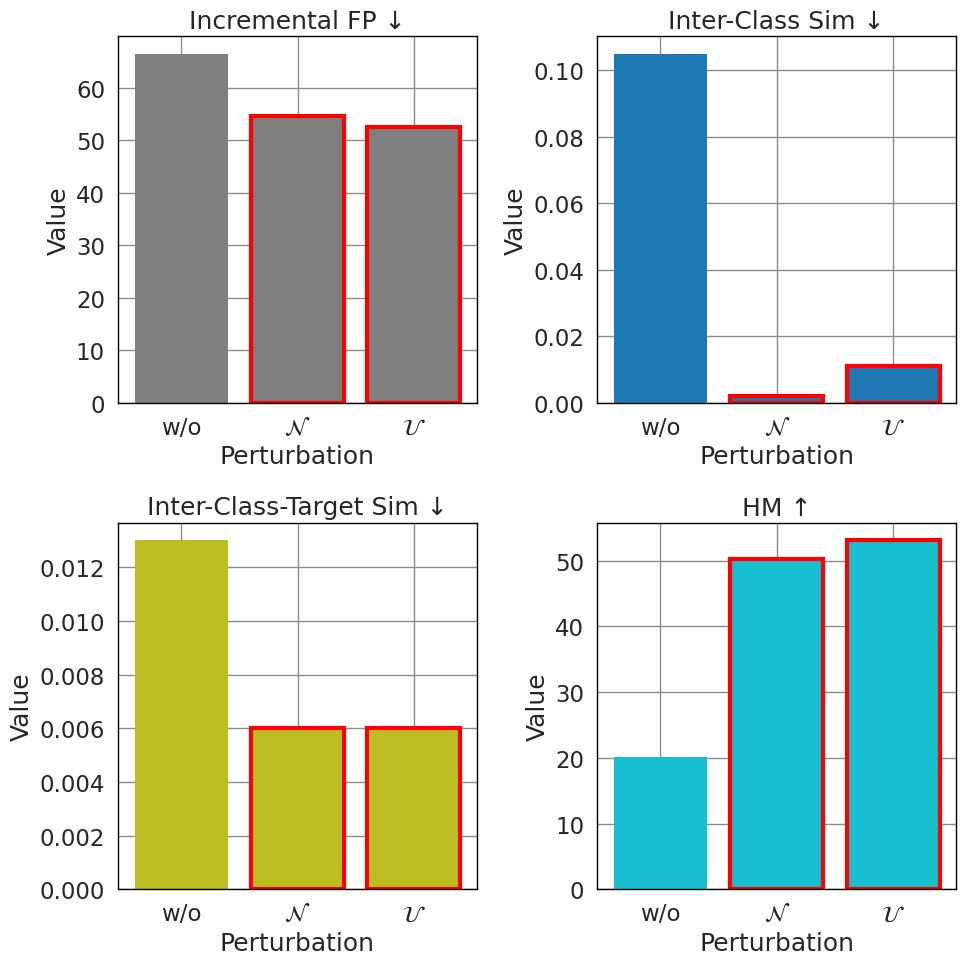

In [1377]:
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
# Plotting the data as a bar plot

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

highlight_index = [1,2]
ecolors = ['red' if i in highlight_index else 'none' for i in range(len(df))]

# Incremental FP
axs[0, 0].bar(df["Perturbation"], df["Incremental FP ↓"], color=colors["NC-FSCIL"], edgecolor=ecolors, linewidth=3)
axs[0, 0].set_title('Incremental FP ↓')
axs[0, 0].set_ylabel('Value')
axs[0, 0].set_xlabel('Perturbation')

# Inter-Class Sim
axs[0, 1].bar(df["Perturbation"], df["Inter-Class Sim ↓"], color=colors["IW"], edgecolor=ecolors, linewidth=3)
axs[0, 1].set_title('Inter-Class Sim ↓')
axs[0, 1].set_ylabel('Value')
axs[0, 1].set_xlabel('Perturbation')

# Inter-Class-Target Sim
axs[1, 0].bar(df["Perturbation"], df["Inter-Class-Target Sim ↓"], color=colors["CEC"], edgecolor=ecolors, linewidth=3)
axs[1, 0].set_title('Inter-Class-Target Sim ↓')
axs[1, 0].set_ylabel('Value')
axs[1, 0].set_xlabel('Perturbation')

# HM_8
axs[1, 1].bar(df["Perturbation"], df["HM ↑"], color=colors["C-FSCIL"], edgecolor=ecolors, linewidth=3)
axs[1, 1].set_title('HM ↑')
axs[1, 1].set_ylabel('Value')
axs[1, 1].set_xlabel('Perturbation')

plt.tight_layout()
plt.show()


# Base vs Novel Session confusion Matrix

In [1765]:
def createConfusionMatrix(y_true, y_pred, classes, binned=True, sessional=False, cmap = None, hline_at = None, vline_at= None, summarize = False, session = 0, cbar=False): #cmap="crest"
    # Build confusion matrix "Confusion matrix whose i-th row and j-th column entry indicates the number of samples with true label being i-th class and predicted label being j-th class."

    if sessional:
        session_ixs = [60, 100]
        session_ixs = session_ixs[:session+1]
        # Confusion matrix gt vs preds. if we want to see which preds are 
        # For all sessions sum the predictions up
        # Map each label to its session
        y_true = np.digitize(y_true, session_ixs)
        y_pred = np.digitize(y_pred, session_ixs)
        classes = session_ixs
        
    cf_matrix = confusion_matrix(y_true, y_pred)
    cf_matrix = cf_matrix / cf_matrix.astype(np.float32).sum(1)[:, np.newaxis]
    
    df_cm = pd.DataFrame(cf_matrix, index=[i for i in classes],
                         columns=[i for i in classes])
#     df_cm = pd.DataFrame(cf_matrix, index=[i for i in classes],
#                          columns=[i for i in classes])
#     df_cm = pd.DataFrame(cf_matrix/cf_matrix.sum(), index=[i for i in classes],
#                          columns=[i for i in classes])

    # Compute for each class the top 5 most confused predictions
    top_preds = np.flip(np.argsort(df_cm.to_numpy(), axis = 1)[:, -6:], axis = 1)

    plt.figure(figsize=(8 if cbar == False else 10, 8))    
    
    if binned:
        colors = sn.color_palette('rocket', 11)
        levels = np.linspace(0,1, 11)
        cmap, norm = matplotlib.colors.from_levels_and_colors(levels, colors, extend="max")
    else:
        cmap = norm = None
    
#     heatmap = sn.heatmap(df_cm/df_cm.sum(), linewidths=0.0, square=True, 
#                          rasterized=True, annot=True, cmap = cmap, vmin=0, vmax=1,
#                          cbar=cbar, annot_kws={"fontsize":40})
    heatmap = sn.heatmap(df_cm, linewidths=0.0, square=True, 
                         rasterized=True, annot=True, cmap = cmap, vmin=0, vmax=1,
                         cbar=cbar, annot_kws={"fontsize":40})
#     if hline_at is not None:
#         # line = heatmap.hlines([hline_at], *heatmap.get_xlim(), colors='y')
#         # line.set_alpha(hline_alpha)  # Set opacity of the horizontal line
#         line = heatmap.hlines([hline_at],*heatmap.get_xlim(), colors='y')
#         line.set_alpha(0.7)
#     if vline_at is not None:
#         line = heatmap.vlines([vline_at],*heatmap.get_ylim(), colors='y')
#         line.set_alpha(0.7)

#     heatmap.set(font_scale=2)  # crazy big
    
    if not sessional:
        y_ticks_indices = np.arange(0, len(x_labels), 10)
        heatmap.set_yticks(y_ticks_indices)
        heatmap.set_yticklabels([classes[i] for i in y_ticks_indices])

        x_ticks_indices = np.arange(0, len(classes), 10)
        heatmap.set_xticks(x_ticks_indices)
        heatmap.set_xticklabels([classes[i] for i in x_ticks_indices])
    else:
        x_labels = ["base", "inc"]
#         y_ticks_indices = np.arange(0, len(session_ixs))
#         heatmap.set_yticklabels("")
#         heatmap.set_yticks(y_ticks_indices + 0.4999,      minor=True)
#         heatmap.set_yticklabels([str(i) for i in y_ticks_indices], minor=True)

#         x_ticks_indices = np.arange(0, len(session_ixs))
#         heatmap.set_xticklabels("")
#         heatmap.set_xticks(x_ticks_indices + 0.4999,      minor=True)
#         heatmap.set_xticklabels([str(i) for i in x_ticks_indices], minor=True)
    heatmap.set_xticklabels(x_labels, fontsize=30)
    heatmap.set_yticklabels(x_labels, fontsize=30)

    plt.yticks(rotation=0)
    plt.xticks(rotation=0)
#     heatmap.set(xlabel="Predicted Classes", ylabel="True Classes", fontsize=20)
    if not sessional:
        heatmap.set_xlabel('Predicted Classes',fontsize=30)
        heatmap.set_ylabel('True Classes',fontsize=40)
    else:
        heatmap.set_xlabel('Predicted Session',fontsize=40)
        heatmap.set_ylabel('True Session',fontsize=40)
        
    heatmap.xaxis.set_label_coords(0.5,-0.1)
    
    return {"cm": heatmap.get_figure(), "df":df_cm}

In [1766]:
input_file_path = r"/BS/fscil/work/code/CEC-CVPR2021/figures/artefacts/unicon/testing_art_8.pickle"

load_obj = None
with open(input_file_path, "rb") as input_file:
    load_obj = pickle.load(input_file)
    
preds = np.argmax(load_obj["all_probs"], axis = 1)

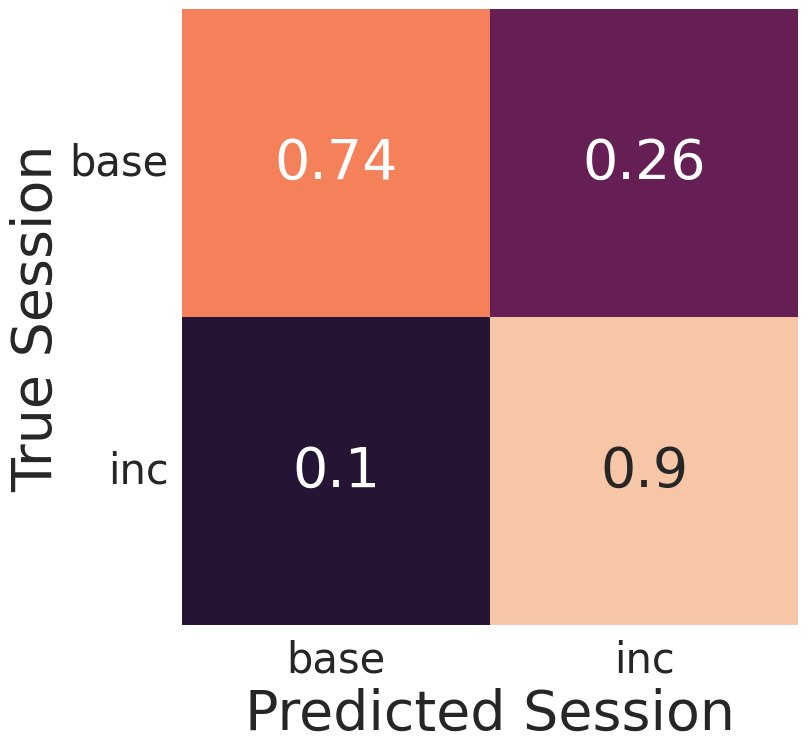

In [1767]:
cm_sessional_unicon = createConfusionMatrix(load_obj["all_targets"], preds, classes, sessional=True, hline_at=1, vline_at=1, session=load_obj["session"], binned=False)

In [1768]:
input_file_path = r"/BS/fscil/work/code/CEC-CVPR2021/figures/artefacts/ncfscil_minet/testing_art_9.pickle"

load_obj = None
with open(input_file_path, "rb") as input_file:
    load_obj = pickle.load(input_file)

test_class = load_obj["base_class"] + (load_obj["session"] - 1) * load_obj["way"]
classes = [str(i) for i in range(test_class)]

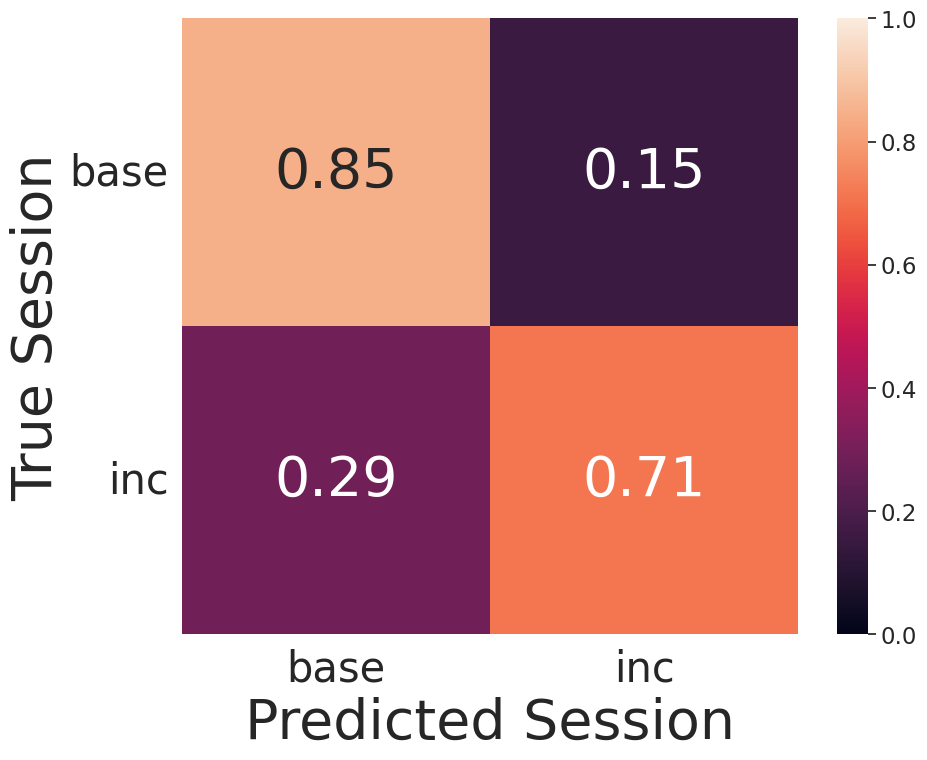

In [1769]:
cm_sessional_nc = createConfusionMatrix(load_obj["all_targets"].numpy(), np.array(load_obj["all_probs"]), classes, sessional=True, hline_at=1, vline_at=1, session=load_obj["session"]-1, binned=False, cbar=True)

In [1770]:
cm_sessional_unicon["cm"].savefig("./figure_exports/cm_unicon_base_inc.pdf", dpi=400,bbox_inches='tight')
cm_sessional_nc["cm"].savefig("./figure_exports/cm_nc_base_inc.pdf", dpi=400,bbox_inches='tight')

# Base vs Novel Session confusion Matrix

In [2080]:
# perturbation_magnitudes = [0.5, 0.1, 0.05, 0.01, 0.001, 0.005]
# hms = [52.385, 57.944, 57.982, 58.122, 58.095, 58.066]

# Minet with perts and batch size same
perturbation_magnitudes = [1, 0.1, 0.01, 0.001, 0.0]
hms = [49.836, 57.944, 58.122, 58.095, 57.96][::-1]

# CIFAR with pert and batch size not even
perturbation_magnitudes = [1, 0.1, 0.01, 0.001, 0.0]
hms = [47.790, 57.154, 57.242, 57.077, 57.105][::-1]
# perturbation_magnitudes = [0.1, 0.01, 0.001, 0.0]
# hms = [57.154, 57.242, 57.077, 57.105][::-1]

/tmp/ipykernel_8654/2756787957.py:42: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='gray', linestyle='-', linewidth=0.3)


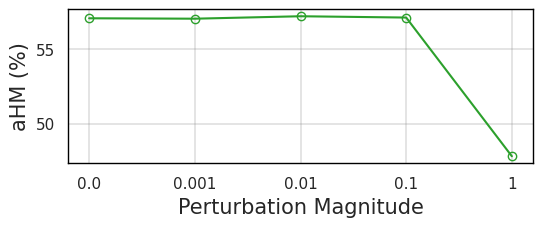

In [2082]:
import matplotlib.pyplot as plt


# Data for plotting
x = np.arange(len(perturbation_magnitudes))
y = hms



# Create the plot

plt.figure(figsize=(6, 2))  # Size is adjusted to mimic the provided image aspect ratio
plt.plot(x, y, marker='o', color=colors["OrCo(Ours)"], label='HM', markerfacecolor='none')  # Green line with circle markers


# Add the legend outside of the plot to the right
# plt.legend(loc='lower right', bbox_to_anchor=(1, 0))



# Set the y-axis limits to give some space above and below the line
# plt.ylim(49, 59)
# plt.xscale('log')
# plt.xlim(0.0, 1.0)
plt.yticks(fontsize=11)
# plt.xticks(fontsize=12)
# plt.set_ticks(x, axis="x")
# plt.locator_params(axis='x', tight=True)

xticks_label = ['{}'.format(num) for num in perturbation_magnitudes]
plt.xticks([0,1,2,3,4], xticks_label[::-1], fontsize=11)
# plt.xticks(np.arange(len(x)), x[::-1])

plt.ylabel("aHM (%)", fontsize=15)
plt.xlabel("Perturbation Magnitude", fontsize=15)

# Remove the top and right spines

# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)

plt.grid(b=True, which='major', color='gray', linestyle='-', linewidth=0.3)
# plt.grid(True)
plt.savefig("./figure_exports/perturbation_magnitude.pdf", dpi=400,bbox_inches='tight')

# Show the plot
plt.show()

# Create the random orth plot

In [145]:
n_vec = 100
powers_2 = np.arange(5, 20)

angles = []
dims = []
for p2 in powers_2:
    feature_dim = 2**p2
    points = torch.randn(n_vec, feature_dim)
    points = normalize(points)
    curr_angle, curr_angle_close = compute_angles(points)
    print(f"Angle {curr_angle:.2f}, Feature Dim: {feature_dim}, ")
    angles.append(curr_angle)
    dims.append(dims)
#     points = torch.nn.Parameter(points)

#     opt = torch.optim.SGD([points], lr=1)
#     temperature = 1



Angle 85.81, Feature Dim: 32, 
Angle 87.20, Feature Dim: 64, 
Angle 87.89, Feature Dim: 128, 
Angle 88.54, Feature Dim: 256, 
Angle 88.97, Feature Dim: 512, 
Angle 89.27, Feature Dim: 1024, 
Angle 89.50, Feature Dim: 2048, 
Angle 89.65, Feature Dim: 4096, 
Angle 89.76, Feature Dim: 8192, 
Angle 89.82, Feature Dim: 16384, 
Angle 89.87, Feature Dim: 32768, 
Angle 89.91, Feature Dim: 65536, 
Angle 89.94, Feature Dim: 131072, 
Angle 89.95, Feature Dim: 262144, 
Angle 89.97, Feature Dim: 524288, 


/tmp/ipykernel_2668915/697497347.py:44: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='gray', linestyle='-', linewidth=0.3)


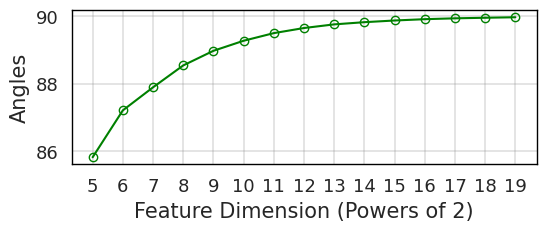

In [160]:
# plt.rcParams["axes.edgecolor"] = "black"
# plt.rcParams["axes.linewidth"] = 1
# plt.rcParams['axes.facecolor'] = 'white'
# plt.rcParams['axes.grid'] = True

# Data for plotting
x = powers_2
y = angles

# Create the plot

# fig = plt.figure()
# ax = fig.gca()

plt.figure(figsize=(6, 2))  # Size is adjusted to mimic the provided image aspect ratio
plt.plot(x, y, marker='o', color="green", label='HM', markerfacecolor='none')  # Green line with circle markers


# Add the legend outside of the plot to the right
# plt.legend(loc='lower right', bbox_to_anchor=(1, 0))



# Set the y-axis limits to give some space above and below the line
# plt.ylim(49, 59)
# plt.xscale('log')
# plt.xlim(0.0, 1.0)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)

# xticks_label = ['{}'.format(num) for num in perturbation_magnitudes]
# plt.xticks([0,1,2,3,4], xticks_label[::-1], fontsize=11)
plt.xticks(x, x)

plt.ylabel("Angles", fontsize=15)
plt.xlabel("Feature Dimension (Powers of 2)", fontsize=15)

# Remove the top and right spines

# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)


plt.grid(b=True, which='major', color='gray', linestyle='-', linewidth=0.3)
plt.savefig("./figure_exports/angleagaintsfeatureoutput.pdf", dpi=400,bbox_inches='tight')

# Show the plot
plt.show()